In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df = pd.read_csv('drive/MyDrive/PD/SWaT_dataset_Jul_19_v2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,74,75,76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
df.head()

,Unnamed: 0,P1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,P2,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,P3,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,P4,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,P5,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,P6,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,LS 201,LS 202,LSL 203,LSLL 203,MV201,P2_STATE,P201 Status,P202 Status,P203 Status,P204 Status,P205 Status,P206 Status,P207 Status,P208 Status,AIT 301,AIT 302,AIT 303,DPIT 301,FIT 301,LIT 301,MV 301,MV 302,MV 303,MV 304,P3_STATE,P301 Status,P302 Status,AIT 401,AIT 402,FIT 401,LIT 401,LS 401,P4_STATE,P401 Status,P402 Status,P403 Status,P404 Status,UV401,AIT 501,AIT 502,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,MV 501,MV 502,MV 503,MV 504,P5_STATE,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503,FIT 601,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
1,timestamp,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value
2,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.7021,1,1,1,1,99,1,1,0,87.9518051,0.7817402,1000.62805,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,46.0651131,0.781594455,0.3103625,0.6236277,0.2134324,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.902344,1,1,1,1,99,1,1,0,87.82363,0.782380462,1000.55115,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.7575,0.7822353,0.315101832,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.3443,1,1,1,1,99,1,1,0,87.7980042,0.7830207,1000.282,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.60369,0.7822353,0.3170232,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


On met les bons noms de colones

In [85]:
df.columns = df.loc[0]

In [86]:
df.head()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,LS 201,LS 202,LSL 203,LSLL 203,MV201,P2_STATE,P201 Status,P202 Status,P203 Status,P204 Status,P205 Status,P206 Status,P207 Status,P208 Status,AIT 301,AIT 302,AIT 303,DPIT 301,FIT 301,LIT 301,MV 301,MV 302,MV 303,MV 304,P3_STATE,P301 Status,P302 Status,AIT 401,AIT 402,FIT 401,LIT 401,LS 401,P4_STATE,P401 Status,P402 Status,P403 Status,P404 Status,UV401,AIT 501,AIT 502,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,MV 501,MV 502,MV 503,MV 504,P5_STATE,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503,FIT 601,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,LS 201,LS 202,LSL 203,LSLL 203,MV201,P2_STATE,P201 Status,P202 Status,P203 Status,P204 Status,P205 Status,P206 Status,P207 Status,P208 Status,AIT 301,AIT 302,AIT 303,DPIT 301,FIT 301,LIT 301,MV 301,MV 302,MV 303,MV 304,P3_STATE,P301 Status,P302 Status,AIT 401,AIT 402,FIT 401,LIT 401,LS 401,P4_STATE,P401 Status,P402 Status,P403 Status,P404 Status,UV401,AIT 501,AIT 502,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,MV 501,MV 502,MV 503,MV 504,P5_STATE,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503,FIT 601,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
1,timestamp,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value,value
2,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.7021,1,1,1,1,99,1,1,0,87.9518051,0.7817402,1000.62805,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,46.0651131,0.781594455,0.3103625,0.6236277,0.2134324,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.902344,1,1,1,1,99,1,1,0,87.82363,0.782380462,1000.55115,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.7575,0.7822353,0.315101832,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.3443,1,1,1,1,99,1,1,0,87.7980042,0.7830207,1000.282,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.60369,0.7822353,0.3170232,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


On supprime les lignes inutiles

In [87]:
df = df.drop([0,1], axis=0)

In [88]:
df.head()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,LS 201,LS 202,LSL 203,LSLL 203,MV201,P2_STATE,P201 Status,P202 Status,P203 Status,P204 Status,P205 Status,P206 Status,P207 Status,P208 Status,AIT 301,AIT 302,AIT 303,DPIT 301,FIT 301,LIT 301,MV 301,MV 302,MV 303,MV 304,P3_STATE,P301 Status,P302 Status,AIT 401,AIT 402,FIT 401,LIT 401,LS 401,P4_STATE,P401 Status,P402 Status,P403 Status,P404 Status,UV401,AIT 501,AIT 502,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,MV 501,MV 502,MV 503,MV 504,P5_STATE,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503,FIT 601,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
2,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.7021,1,1,1,1,99,1,1,0,87.9518051,0.7817402,1000.62805,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,46.0651131,0.781594455,0.3103625,0.6236277,0.2134324,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.902344,1,1,1,1,99,1,1,0,87.82363,0.782380462,1000.55115,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.7575,0.7822353,0.315101832,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.3443,1,1,1,1,99,1,1,0,87.7980042,0.7830207,1000.282,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.60369,0.7822353,0.3170232,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
5,2019-07-20T04:30:03.004013Z,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.7048,1,1,1,1,99,1,1,0,87.6954651,0.7830207,1000.74341,Inactive,4,2,1,1,1,2,7.4896183,147.167389,1016.27789,45.60369,0.783132553,0.3080569,0.6236277,0.212791845,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
6,2019-07-20T04:30:04Z,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.7448,1,1,1,1,99,1,1,0,87.61856,0.781228,1000.39734,Inactive,4,2,1,1,1,2,7.4896183,147.090485,1016.27789,45.2191734,0.7837734,0.303445637,0.6236277,0.2140089,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


Mise a jour des index

In [89]:
df.reset_index(inplace=True, drop=True)

In [90]:
df.head()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,LS 201,LS 202,LSL 203,LSLL 203,MV201,P2_STATE,P201 Status,P202 Status,P203 Status,P204 Status,P205 Status,P206 Status,P207 Status,P208 Status,AIT 301,AIT 302,AIT 303,DPIT 301,FIT 301,LIT 301,MV 301,MV 302,MV 303,MV 304,P3_STATE,P301 Status,P302 Status,AIT 401,AIT 402,FIT 401,LIT 401,LS 401,P4_STATE,P401 Status,P402 Status,P403 Status,P404 Status,UV401,AIT 501,AIT 502,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,MV 501,MV 502,MV 503,MV 504,P5_STATE,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503,FIT 601,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.7021,1,1,1,1,99,1,1,0,87.9518051,0.7817402,1000.62805,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,46.0651131,0.781594455,0.3103625,0.6236277,0.2134324,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
1,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.902344,1,1,1,1,99,1,1,0,87.82363,0.782380462,1000.55115,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.7575,0.7822353,0.315101832,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.3443,1,1,1,1,99,1,1,0,87.7980042,0.7830207,1000.282,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.60369,0.7822353,0.3170232,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:03.004013Z,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.7048,1,1,1,1,99,1,1,0,87.6954651,0.7830207,1000.74341,Inactive,4,2,1,1,1,2,7.4896183,147.167389,1016.27789,45.60369,0.783132553,0.3080569,0.6236277,0.212791845,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:04Z,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.7448,1,1,1,1,99,1,1,0,87.61856,0.781228,1000.39734,Inactive,4,2,1,1,1,2,7.4896183,147.090485,1016.27789,45.2191734,0.7837734,0.303445637,0.6236277,0.2140089,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


On modifie le nom de la colone temps

In [91]:
df = df.rename(columns={"GMT +0":"timestamp"})

On modifie cette colone en ne gardant que l'heure, les minutes et les secondes et on stocke sous format timedelta

!! A voir si il faut pas garder aussi les millisecondes et les micro secondes !!

In [92]:
import re
from datetime import timedelta

In [93]:
date_pattern = '[0-9]{2}:[0-9]{2}:[0-9]*'
i=0
for date in df['timestamp']:
    hour = re.findall(date_pattern, date)
    h = str(hour)[2:10]
    n = h.split(':')
    df['timestamp'][i] = timedelta(hours=int(n[0]), minutes=int(n[1]), seconds=int(n[2]))
    i+=1

In [95]:
df.head()

,timestamp,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,LS 201,LS 202,LSL 203,LSLL 203,MV201,P2_STATE,P201 Status,P202 Status,P203 Status,P204 Status,P205 Status,P206 Status,P207 Status,P208 Status,AIT 301,AIT 302,AIT 303,DPIT 301,FIT 301,LIT 301,MV 301,MV 302,MV 303,MV 304,P3_STATE,P301 Status,P302 Status,AIT 401,AIT 402,FIT 401,LIT 401,LS 401,P4_STATE,P401 Status,P402 Status,P403 Status,P404 Status,UV401,AIT 501,AIT 502,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,MV 501,MV 502,MV 503,MV 504,P5_STATE,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503,FIT 601,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,4:30:00,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.7021,1,1,1,1,99,1,1,0,87.9518051,0.7817402,1000.62805,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,46.0651131,0.781594455,0.3103625,0.6236277,0.2134324,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
1,4:30:01,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.902344,1,1,1,1,99,1,1,0,87.82363,0.782380462,1000.55115,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.7575,0.7822353,0.315101832,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,4:30:02,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.3443,1,1,1,1,99,1,1,0,87.7980042,0.7830207,1000.282,Inactive,4,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.60369,0.7822353,0.3170232,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,4:30:03,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.7048,1,1,1,1,99,1,1,0,87.6954651,0.7830207,1000.74341,Inactive,4,2,1,1,1,2,7.4896183,147.167389,1016.27789,45.60369,0.783132553,0.3080569,0.6236277,0.212791845,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,4:30:04,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.7448,1,1,1,1,99,1,1,0,87.61856,0.781228,1000.39734,Inactive,4,2,1,1,1,2,7.4896183,147.090485,1016.27789,45.2191734,0.7837734,0.303445637,0.6236277,0.2140089,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


On creer les colones qui serviront pour labeliser les attaques
Pour l'instant que des 0

In [96]:
df['FIT401_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['LIT301_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['P601_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['MultiPoint_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['MV501_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['P301_attack'] = pd.Series(np.zeros(len(df)).astype(int))

In [97]:
df.head()

,timestamp,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,LS 201,LS 202,LSL 203,LSLL 203,MV201,P2_STATE,P201 Status,P202 Status,P203 Status,P204 Status,P205 Status,P206 Status,P207 Status,P208 Status,AIT 301,AIT 302,AIT 303,DPIT 301,FIT 301,LIT 301,MV 301,MV 302,MV 303,MV 304,P3_STATE,P301 Status,P302 Status,AIT 401,AIT 402,...,P401 Status,P402 Status,P403 Status,P404 Status,UV401,AIT 501,AIT 502,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,MV 501,MV 502,MV 503,MV 504,P5_STATE,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503,FIT 601,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status,FIT401_attack,LIT301_attack,P601_attack,MultiPoint_attack,MV501_attack,P301_attack
0,4:30:00,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.7021,1,1,1,1,99,1,1,0,87.9518051,...,2,1,1,1,2,7.4896183,147.3981,1016.27789,46.0651131,0.781594455,0.3103625,0.6236277,0.2134324,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1,0,0,0,0,0,0
1,4:30:01,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,730.902344,1,1,1,1,99,1,1,0,87.82363,...,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.7575,0.7822353,0.315101832,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1,0,0,0,0,0,0
2,4:30:02,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.3443,1,1,1,1,99,1,1,0,87.7980042,...,2,1,1,1,2,7.4896183,147.3981,1016.27789,45.60369,0.7822353,0.3170232,0.6236277,0.212984011,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1,0,0,0,0,0,0
3,4:30:03,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.7048,1,1,1,1,99,1,1,0,87.6954651,...,2,1,1,1,2,7.4896183,147.167389,1016.27789,45.60369,0.783132553,0.3080569,0.6236277,0.212791845,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1,0,0,0,0,0,0
4,4:30:04,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,2.335437,Inactive,Inactive,Inactive,Inactive,2,2,1,1,2,1,2,1,1,1,8.522921,256.431274,143.158966,1.19085729,0.000512443,732.7448,1,1,1,1,99,1,1,0,87.61856,...,2,1,1,1,2,7.4896183,147.090485,1016.27789,45.2191734,0.7837734,0.303445637,0.6236277,0.2140089,2,2,1,1,12,2,1,167.601257,2.96350884,119.921173,0.000320379,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1,0,0,0,0,0,0


### - Labelisation des données representant les 6 attaques

On déclare les debuts et fins des differentes attaques
A noter que les heures indiqué dans le pdf expliquant le déroulement des attaques sont à GMT +8 de celles du csv

In [98]:
deb_FIT401 = timedelta(hours=7, minutes=8, seconds=46)
fin_FIT401 = timedelta(hours=7, minutes=10, seconds=31)

deb_LIT301 = timedelta(hours=7, minutes=15, seconds=0)
fin_LIT301 = timedelta(hours=7, minutes=19, seconds=32)

deb_P601 = timedelta(hours=7, minutes=26, seconds=57)
fin_P601 = timedelta(hours=7, minutes=30, seconds=48)

deb_MultiPoint = timedelta(hours=7, minutes=38, seconds=50)
fin_MultiPoint = timedelta(hours=7, minutes=46, seconds=20)

deb_MV501 = timedelta(hours=7, minutes=54, seconds=0)
fin_MV501 = timedelta(hours=7, minutes=56, seconds=0)

deb_P301 = timedelta(hours=8, minutes=2, seconds=56)
fin_P301 = timedelta(hours=8, minutes=16, seconds=18)

Parcourt du dataframe pour labeliser les données selon les attaques

In [99]:
i = 0
for date in df['timestamp']:
    if(date > deb_FIT401 and date < fin_FIT401):
        df['FIT401_attack'][i] = 1
    if(date > deb_LIT301 and date < fin_LIT301):
        df['LIT301_attack'][i] = 1
    if(date > deb_P601 and date < fin_P601):
        df['P601_attack'][i] = 1
    if(date > deb_MultiPoint and date < fin_MultiPoint):
        df['MultiPoint_attack'][i] = 1
    if(date > deb_MV501 and date < fin_MV501):
        df['MV501_attack'][i] = 1
    if(date > deb_P301 and date < fin_P301):
        df['P301_attack'][i] = 1

    i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Sett

In [100]:
print("Nombre de données avec attaque sur FIT401 : " + str(len(df.loc[df['FIT401_attack'] == 1])))
print("Nombre de données avec attaque sur LIT301 : " + str(len(df.loc[df['LIT301_attack'] == 1])))
print("Nombre de données avec attaque sur P601 : " + str(len(df.loc[df['P601_attack'] == 1])))
print("Nombre de données avec attaque multi point : " + str(len(df.loc[df['MultiPoint_attack'] == 1])))
print("Nombre de données avec attaque sur MV501 : " + str(len(df.loc[df['MV501_attack'] == 1])))
print("Nombre de données avec attaque sur P301 : " + str(len(df.loc[df['P301_attack'] == 1])))

Nombre de données avec attaque sur FIT401 : 104
Nombre de données avec attaque sur LIT301 : 271
Nombre de données avec attaque sur P601 : 230
Nombre de données avec attaque multi point : 449
Nombre de données avec attaque sur MV501 : 119
Nombre de données avec attaque sur P301 : 801


# A faire :

## - Etudier les données comme dans tp1 et tp2 (min, max, ...)
## - Appliquer un premier algo d'analyse

## Data Observation

In [101]:
#Nombr de colonnes
nbCols = len(df.columns)
print("Nombre de colonnes dans le dataset: " + str(nbCols))

Nombre de colonnes dans le dataset: 84


In [102]:
#Noms des colonnes et leurs types
for i in df.columns:
  print(i + ", type: " + str(df.dtypes[i]))

timestamp, type: object
FIT 101, type: object
LIT 101, type: object
MV 101, type: object
P1_STATE, type: object
P101 Status, type: object
P102 Status, type: object
AIT 201, type: object
AIT 202, type: object
AIT 203, type: object
FIT 201, type: object
LS 201, type: object
LS 202, type: object
LSL 203, type: object
LSLL 203, type: object
MV201, type: object
P2_STATE, type: object
P201 Status, type: object
P202 Status, type: object
P203 Status, type: object
P204 Status, type: object
P205 Status, type: object
P206 Status, type: object
P207 Status, type: object
P208 Status, type: object
AIT 301, type: object
AIT 302, type: object
AIT 303, type: object
DPIT 301, type: object
FIT 301, type: object
LIT 301, type: object
MV 301, type: object
MV 302, type: object
MV 303, type: object
MV 304, type: object
P3_STATE, type: object
P301 Status, type: object
P302 Status, type: object
AIT 401, type: object
AIT 402, type: object
FIT 401, type: object
LIT 401, type: object
LS 401, type: object
P4_STATE,

In [103]:
#Taille du dataset
print("La taille du dataset est: " + str(len(df)))

La taille du dataset est: 14996


In [104]:
#Quels sont les attributs catégoriques?
#Dans le jeu de données original, toutes les colonnes avaient le type 'object'
#Mais en examinant les differentes valeurs possibls dans chacune des colonnes
#il nous semble que certaines colonnes sont bien catégoriques mais qu'il en 
#existe qui sont numériques

#Liste de colonnes qui nous semblent être catégoriques
cat_list = ['MV 101','P1_STATE','P101 Status','P102 Status','LS 201','LS 202',\
            'LSL 203','LSLL 203','MV201','P2_STATE','P201 Status','P202 Status',\
            'P203 Status','P204 Status','P205 Status','P206 Status','P207 Status',\
            'P208 Status','MV 301','MV 302','MV 303','MV 304','P3_STATE',\
            'P301 Status','P302 Status','LS 401','P4_STATE','P401 Status',\
            'P402 Status','P403 Status','P404 Status','UV401','MV 501','MV 502',\
            'MV 503','MV 504','P5_STATE','P501 Status','P502 Status','LSH 601',\
            'LSH 602','LSH 603','LSL 601','LSL 602','LSL 603','P6 STATE',\
            'P601 Status','P602 Status','P603 Status','FIT401_attack',\
            'LIT301_attack','P601_attack','MultiPoint_attack','MV501_attack',\
            'P301_attack']

#Liste de colonnes numériques
num_list = list(set(list(df.columns)) - set(cat_list))

#On enleve de la liste de colonnes numériques la colonne décrivant le temps
num_list.remove('timestamp')

In [105]:
#Pour chaque colonne catégorique on affiche les valeurs possibles
for i in cat_list:
  df[i] = df[i].astype(str).astype(object)
  print("Valeurs possibles de "+ str(i) + ": " + str(df[i].unique()))

Valeurs possibles de MV 101: ['1' '0' '2']
Valeurs possibles de P1_STATE: ['3' '2']
Valeurs possibles de P101 Status: ['2' '1']
Valeurs possibles de P102 Status: ['1']
Valeurs possibles de LS 201: ['Inactive']
Valeurs possibles de LS 202: ['Inactive']
Valeurs possibles de LSL 203: ['Inactive']
Valeurs possibles de LSLL 203: ['Inactive']
Valeurs possibles de MV201: ['2' '0' '1']
Valeurs possibles de P2_STATE: ['2']
Valeurs possibles de P201 Status: ['1']
Valeurs possibles de P202 Status: ['1']
Valeurs possibles de P203 Status: ['2' '1']
Valeurs possibles de P204 Status: ['1']
Valeurs possibles de P205 Status: ['2' '1']
Valeurs possibles de P206 Status: ['1']
Valeurs possibles de P207 Status: ['1']
Valeurs possibles de P208 Status: ['1']
Valeurs possibles de MV 301: ['1' '0' '2']
Valeurs possibles de MV 302: ['1' '0' '2']
Valeurs possibles de MV 303: ['1' '0' '2']
Valeurs possibles de MV 304: ['1' '0' '2']
Valeurs possibles de P3_STATE: ['99' '2' '4' '5' '6' '7' '9' '10' '14' '15' '16']


In [106]:
#Ensuite pour les colonnes numériques nous aimerions afficher pour chaque 
#colonne, le minmum, le maximum, la moyenne, la mediane et l'ecart-type.
#Pour faire cela, nous devons d'abord changer le type de la colonne en float

for i in num_list:
    df[i] = df[i].astype(float)

for i in num_list:
    print(df[i].describe())

count    14996.000000
mean         0.611743
std          0.015349
min          0.583043
25%          0.608264
50%          0.610441
75%          0.611465
max          0.769324
Name: FIT 503, dtype: float64
count    14996.000000
mean       247.985162
std         11.806186
min        198.077423
25%        239.887200
50%        246.218918
75%        257.190460
max        272.289154
Name: AIT 203, dtype: float64
count    14996.000000
mean         9.210022
std          0.175812
min          8.768457
25%          9.090170
50%          9.233082
75%          9.345873
max          9.490067
Name: AIT 202, dtype: float64
count    14996.000000
mean         0.824523
std          0.856954
min          0.000000
25%          0.000512
50%          0.000641
75%          1.718220
max          1.856452
Name: FIT 301, dtype: float64
count    14996.000000
mean       886.224353
std         63.100612
min        756.921300
25%        832.132800
50%        881.274048
75%        940.230069
max       1003.550350


In [107]:
#On vérifie s'il y a des NaN dans les colonnes pour eventuellement les éliminer.
#Mais comme nous pouvons voir, il n'y en a pas
nan = False
cols = list(df.columns)
for i in cols:
    nan_number = df[i].isna().sum()
    if (nan_number > 0):
        print(str((nan_number/df.shape[0])*100)+'%')
        nan = True
        
if (nan == False):
    print('Il n\'y a pas de données manquantes')

Il n'y a pas de données manquantes


## Matrice de correlation

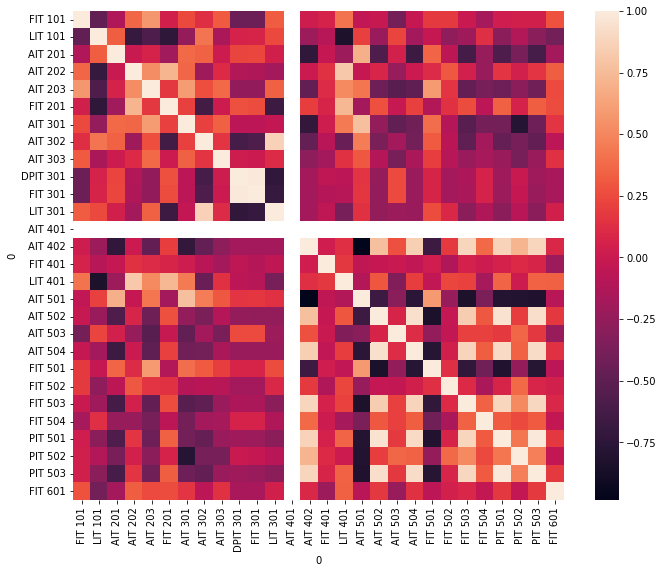

In [119]:
#AIT 401 est toujours à 0.0
#et les colonnes XXXX_attack sont à 0 parce qu'on a pris une période avant l'attaque
pre_attack = df.loc[df['timestamp'] < deb_FIT401]

pre_attack_correlation_mat = pre_attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pre_attack_correlation_mat)

plt.show()

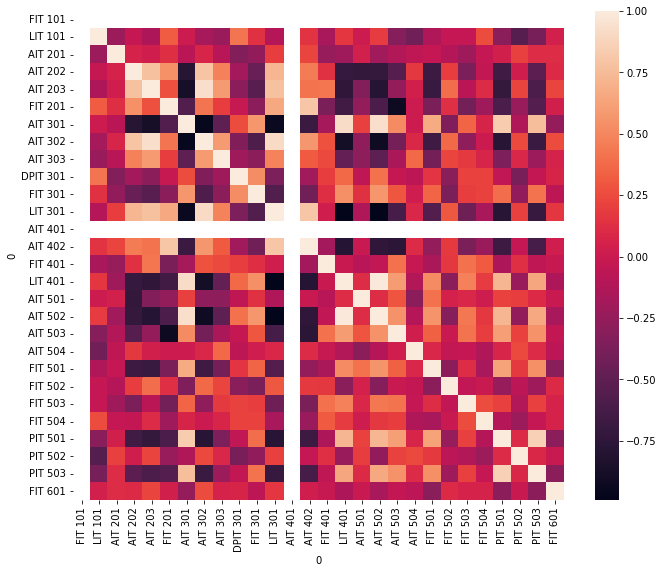

In [120]:
#Matrice de correlation pendant l'attaque sur FIT 401
pdtFit401Attack = df.loc[(df['timestamp'] > deb_FIT401) &\
                         (df['timestamp'] < fin_FIT401)]

pdtFit401Attack_corr = pdtFit401Attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtFit401Attack_corr)

plt.show()

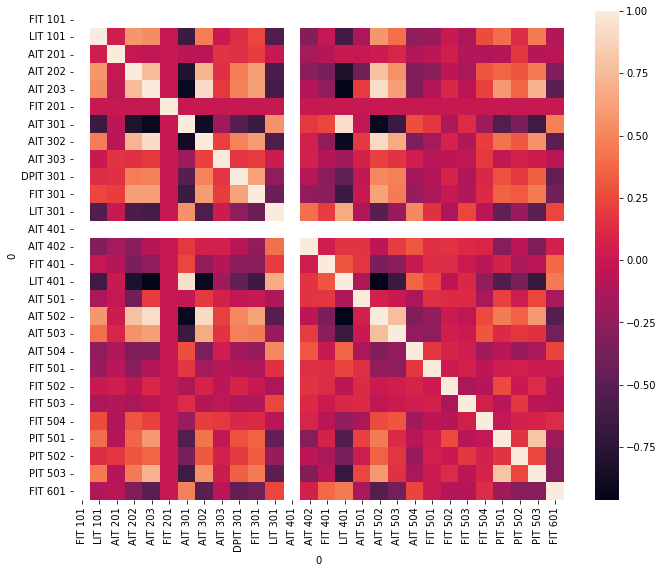

In [121]:
#Matrice de correlation entre l'attaque sur FIT 401 et LIT 301
entreFit401_Lit301 = df.loc[(df['timestamp'] > fin_FIT401) &\
                            (df['timestamp'] < deb_LIT301)]
                        
entreFit401_Lit301_corr = entreFit401_Lit301.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreFit401_Lit301_corr)

plt.show()

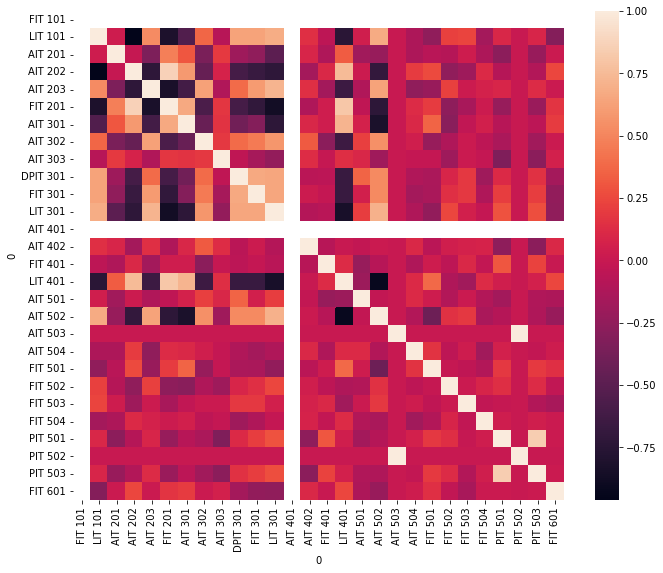

In [122]:
#Matrice de correlation pendant l'attaque sur LIT 301
pdtLit301Attack = df.loc[(df['timestamp'] > deb_LIT301) &\
                         (df['timestamp'] < fin_LIT301)]

pdtLit301Attack_corr = pdtLit301Attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtLit301Attack_corr)

plt.show()

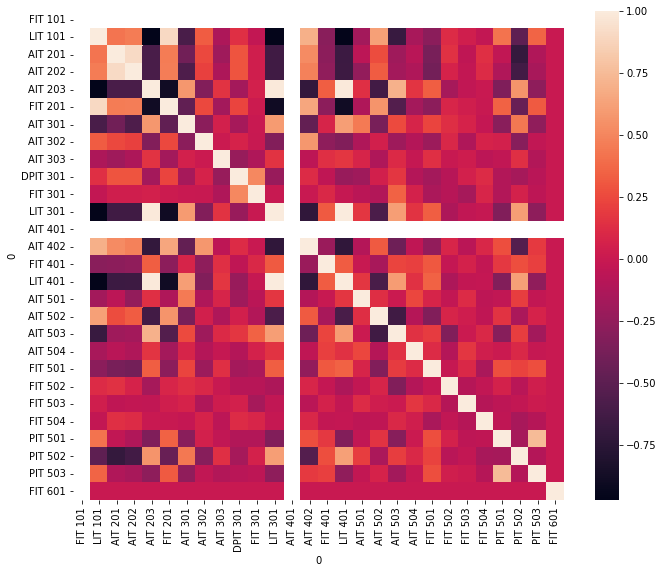

In [123]:
#Matrice de correlation entre l'attaque sur LIT 301 et P601
entreLit301_P601 = df.loc[(df['timestamp'] > fin_LIT301) &\
                            (df['timestamp'] < deb_P601)]
                        
entreLit301_P601_corr = entreLit301_P601.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreLit301_P601_corr)

plt.show()

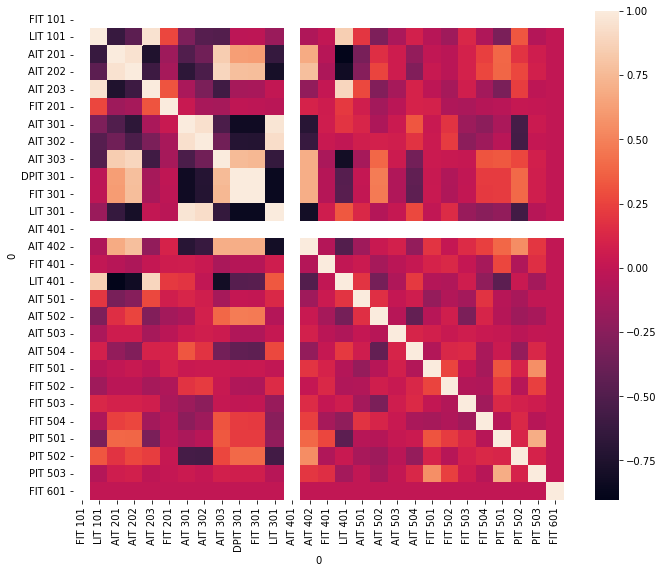

In [124]:
#Matrice de correlation pendant l'attaque sur P601
pdtP601Attack = df.loc[(df['timestamp'] > deb_P601) &\
                         (df['timestamp'] < fin_P601)]

pdtP601Attack_corr = pdtP601Attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtP601Attack_corr)

plt.show()

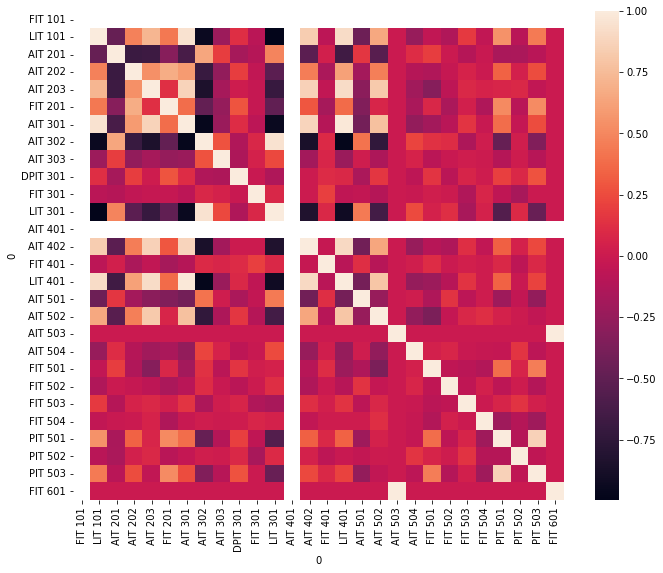

In [125]:
#Matrice de correlation entre l'attaque sur P601 et l'ataque MultiPoint
entreP601_Mp = df.loc[(df['timestamp'] > fin_P601) &\
                            (df['timestamp'] < deb_MultiPoint)]
                        
entreP601_Mp_corr = entreP601_Mp.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreP601_Mp_corr)

plt.show()

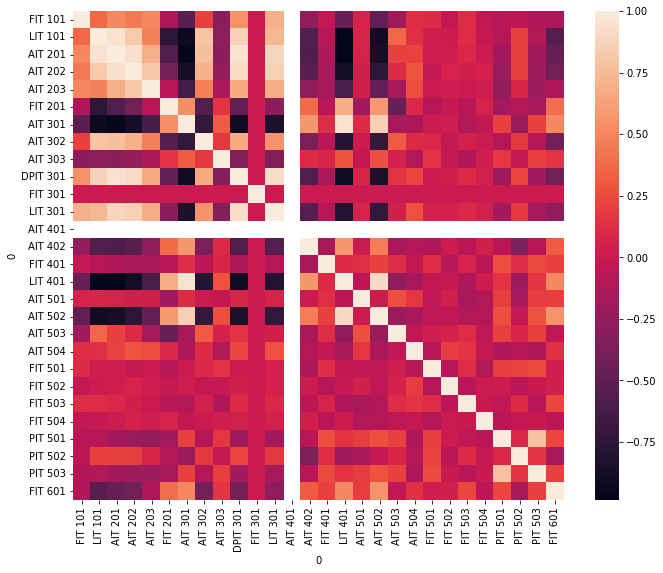

In [126]:
#Matrice de correlation pendant l'attaque MultiPoint
pdtMultiPointAttack = df.loc[(df['timestamp'] > deb_MultiPoint) &\
                         (df['timestamp'] < fin_MultiPoint)]

pdtMultiPointAttack_corr = pdtMultiPointAttack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtMultiPointAttack_corr)

plt.show()

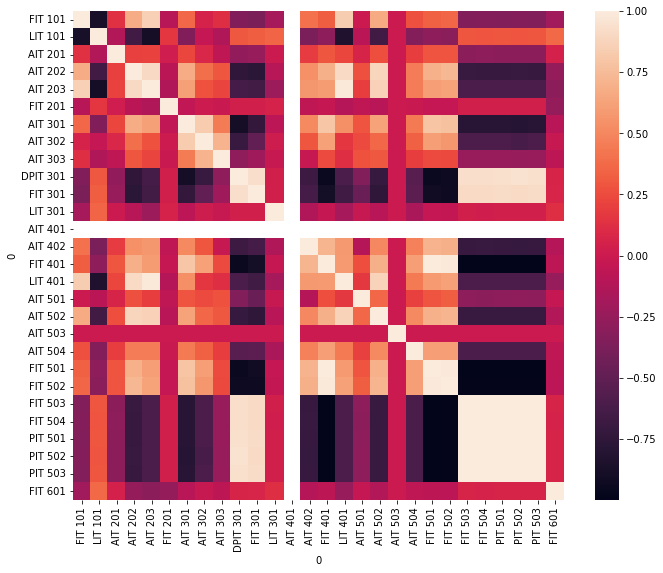

In [127]:
#Matrice de correlation entre l'attaque Multi Point et l'attaque sur MV501
entreMp_MV501 = df.loc[(df['timestamp'] > fin_MultiPoint) &\
                            (df['timestamp'] < deb_MV501)]
                        
entreMp_MV501_corr = entreMp_MV501.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreMp_MV501_corr)

plt.show()

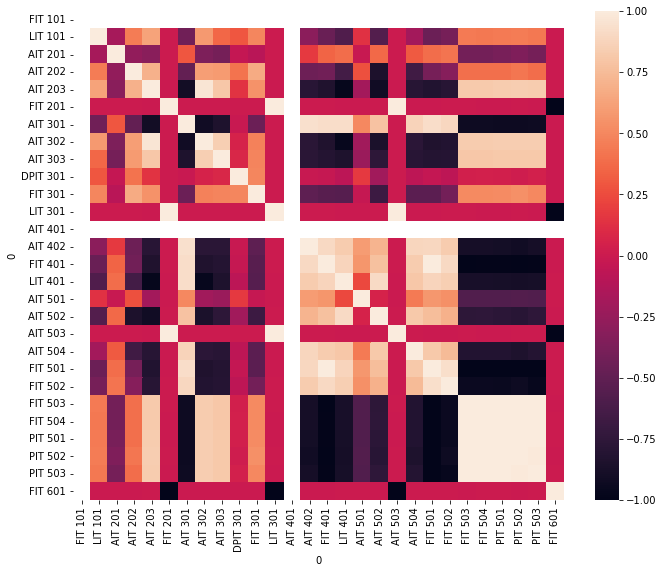

In [128]:
#Matrice de correlation pendant l'attaque MV501
pdtMV501Attack = df.loc[(df['timestamp'] > deb_MV501) &\
                         (df['timestamp'] < fin_MV501)]

pdtMV501Attack_corr = pdtMV501Attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtMV501Attack_corr)

plt.show()

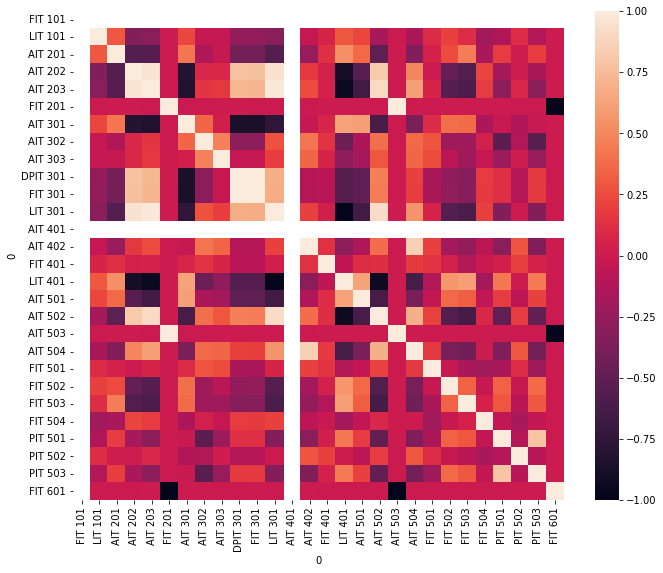

In [130]:
#Matrice de correlation entre l'attaque sur MV501 et sur P301
entreMV501_P301 = df.loc[(df['timestamp'] > fin_MV501) &\
                            (df['timestamp'] < deb_P301)]
                        
entreMV501_P301_corr = entreMV501_P301.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreMV501_P301_corr)

plt.show()

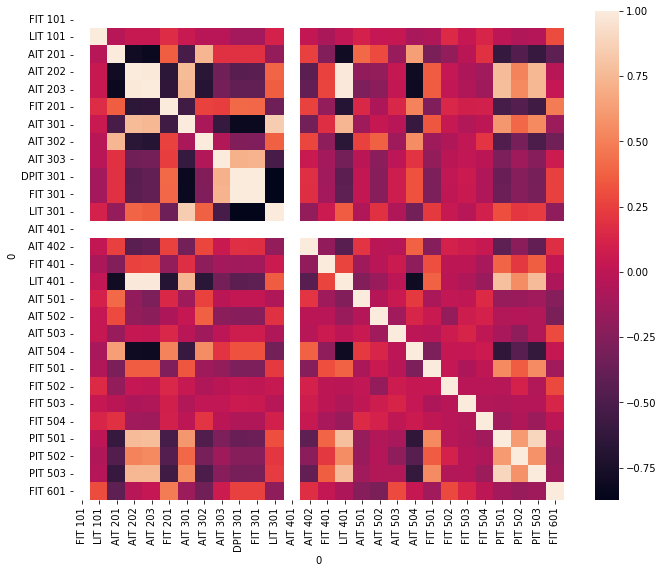

In [131]:
#Matrice de correlation pendant l'attaque sur P301
pdtP301Attack = df.loc[(df['timestamp'] > deb_P301) &\
                         (df['timestamp'] < fin_P301)]

pdtP301Attack_corr = pdtP301Attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtP301Attack_corr)

plt.show()

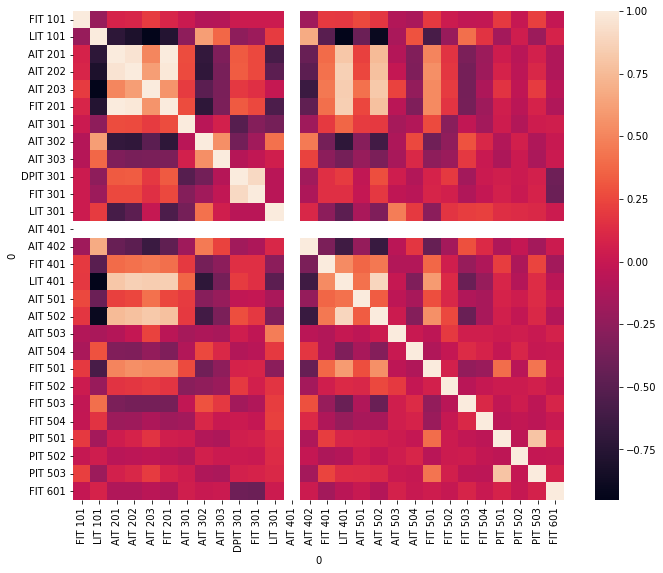

In [132]:
#Matrice de correlation apres toutes les attaques
apresAttack = df.loc[df['timestamp']> fin_P301]

apresAttack_corr = apresAttack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(apresAttack_corr)

plt.show()

float64


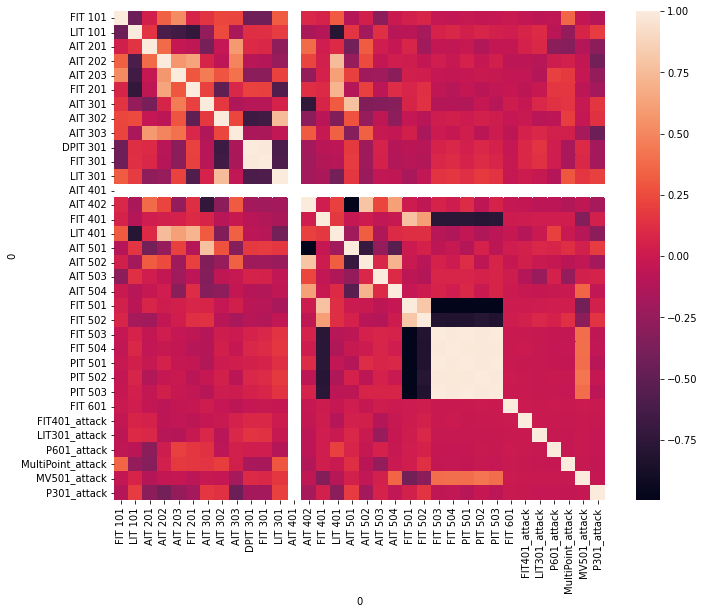

In [145]:
#Matrice de correlation, toutes les données avec les labels d'attaques
bla = df.copy()
bla['FIT401_attack'] = bla['FIT401_attack'].astype(float)
bla['LIT301_attack'] = bla['LIT301_attack'].astype(float)
bla['P601_attack'] = bla['P601_attack'].astype(float)
bla['MultiPoint_attack'] = bla['MultiPoint_attack'].astype(float)
bla['MV501_attack'] = bla['MV501_attack'].astype(float)
bla['P301_attack'] = bla['P301_attack'].astype(float)

print(bla['FIT401_attack'].dtypes)
bla_corr = bla.corr()
plt.figure(figsize=(11,9))
sns.heatmap(bla_corr)

plt.show()

In [166]:
df[['timestamp','LIT 301']][9800:9900].head(100)

,timestamp,LIT 301
9800,7:13:24,878.5408
9801,7:13:25,878.5408
9802,7:13:26,878.5408
9803,7:13:27,1024.0000
9804,7:13:28,1024.0000
...,...,...
9895,7:14:59,1024.0000
9896,7:15:00,1024.0000
9897,7:15:01,1024.0000
9898,7:15:02,1024.0000
